In [ ]:
#5-2-Pearson-Correlation-grah was modified on 4-24-2024 for lh_aparc file

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [7]:
#%%capture
df = pd.read_csv('4-1-add-dx-lh_aparc.csv')
#print(list(df.columns))
len(list(df.columns))
print(df['Age'])

# 1 Mild Cognitive Impairment
# 2 Dementia
# 3 Subjective Memory Complaint/Normal Cognition
# 4 Unknown - defer to record


0      75.0
1      65.0
2      71.0
3      70.0
4      55.0
       ... 
387    77.0
388    57.0
389    82.0
390    68.0
391    65.0
Name: Age, Length: 392, dtype: float64


In [8]:
def draw_3d(df, x_column, y_column, z_column, color, label):

    # Create data points
    x = df[x_column]
    y = df[y_column]
    z = df[z_column]

    # Plot the surface
    ax.scatter(x,y,z, c=color, label = label)

    # Customize the plot
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_zlabel(z_column)
    ax.set_title('3D Scatter Plot')
    ax.legend()


In [9]:
def draw_scatterplot(df, x_column, y_column, color, label):
   
    '''
    Draw scatterplot using data from a DataFrame.
    
    Parameters:
        df (DataFrame): input DataFrame containing the data.
        x_column (str): column  name for the x-axis data.
        y_column (str): column name for the y-axis data.
        color (str): color for the scatterplot points.
        label (str): label for the scatterplot points.
    
    Returns:
        None
    '''
    
    plt.scatter(df[x_column], df[y_column], c=color, label=label)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xlim(-50,300)
    plt.ylim(0,8000)
    plt.legend()


 CN: BNT vs. caudalanteriorcingulate r: 0.12618230630300115, p : 0.3325414992783767
 Dementia: BNT vs. caudalanteriorcingulate r: 0.14654391229625308, p : 0.12659501033746656
 MCI: BNT vs. caudalanteriorcingulate r: 0.2666450066764318, p : 0.00042299390921697204


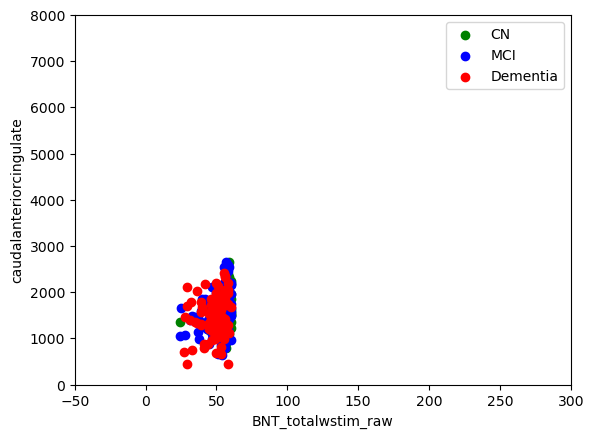

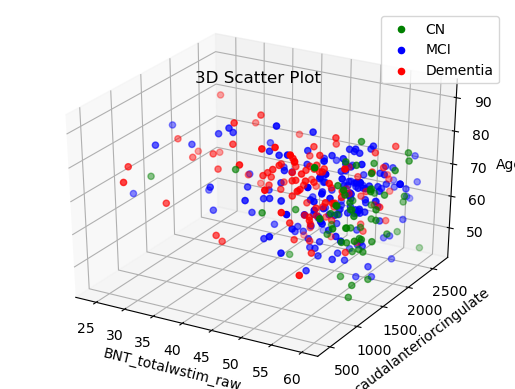

In [10]:
# BNT_totalwstim_raw
CN_df = df[df['syndrome_v2_v2'] == 3]
CN_df = CN_df[['BNT_totalwstim_raw','caudalanteriorcingulate','Age']]
CN_df = CN_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
CN_corr_r, p_value = pearsonr(CN_df['BNT_totalwstim_raw'], CN_df['caudalanteriorcingulate'])
print(f" CN: BNT vs. caudalanteriorcingulate r: {CN_corr_r}, p : {p_value}")

Dementia_df = df[df['syndrome_v2_v2'] == 2]
Dementia_df = Dementia_df[['BNT_totalwstim_raw','caudalanteriorcingulate','Age']]
Dementia_df = Dementia_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
Dementia_corr, _ = pearsonr(Dementia_df['BNT_totalwstim_raw'], Dementia_df['caudalanteriorcingulate'])
print(f" Dementia: BNT vs. caudalanteriorcingulate r: {Dementia_corr}, p : {_}")


MCI_df = df[df['syndrome_v2_v2'] == 1]
MCI_df = MCI_df[['BNT_totalwstim_raw','caudalanteriorcingulate','Age']]
MCI_df = MCI_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
MCI_corr, _ = pearsonr(MCI_df['BNT_totalwstim_raw'], MCI_df['caudalanteriorcingulate'])
print(f" MCI: BNT vs. caudalanteriorcingulate r: {MCI_corr}, p : {_}")

# BNT_totalwstim_raw vs. Left-Caudate
draw_scatterplot(CN_df, 'BNT_totalwstim_raw', 'caudalanteriorcingulate', 'green', 'CN')
draw_scatterplot(MCI_df, 'BNT_totalwstim_raw', 'caudalanteriorcingulate', 'blue', 'MCI')
draw_scatterplot(Dementia_df, 'BNT_totalwstim_raw', 'caudalanteriorcingulate', 'red', 'Dementia')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_3d(CN_df, 'BNT_totalwstim_raw', 'caudalanteriorcingulate', 'Age', 'green', 'CN')
draw_3d(MCI_df, 'BNT_totalwstim_raw', 'caudalanteriorcingulate', 'Age', 'blue', 'MCI')
draw_3d(Dementia_df, 'BNT_totalwstim_raw', 'caudalanteriorcingulate', 'Age', 'red', 'Dementia')
# show the plot
plt.show()


 CN: FAS_total_raw vs. Left-Caudate r: 0.20817949043272632, p : 0.11045036317850543
 Dementia: FAS_total_raw vs. Left-Caudate r: 0.19738429522654677, p : 0.01897228665269912
 MCI: FAS_total_raw vs. Left-Caudate r: 0.23545902070260769, p : 0.0019342319785433104


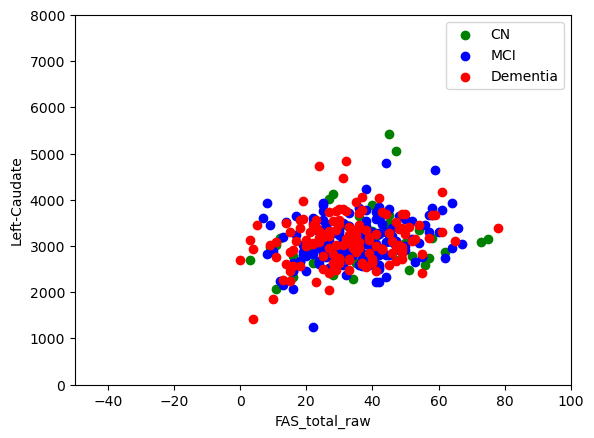

In [27]:
# FAS_total_raw
CN_df = df[df['syndrome_v2_v2'] == 3]
CN_df = CN_df[['FAS_total_raw','Left-Caudate']]
CN_df = CN_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
CN_corr_r, p_value = pearsonr(CN_df['FAS_total_raw'], CN_df['Left-Caudate'])
print(f" CN: FAS_total_raw vs. Left-Caudate r: {CN_corr_r}, p : {p_value}")

Dementia_df = df[df['syndrome_v2_v2'] == 2]
Dementia_df = Dementia_df[['FAS_total_raw','Left-Caudate']]
Dementia_df = Dementia_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
Dementia_corr, _ = pearsonr(Dementia_df['FAS_total_raw'], Dementia_df['Left-Caudate'])
print(f" Dementia: FAS_total_raw vs. Left-Caudate r: {Dementia_corr}, p : {_}")


MCI_df = df[df['syndrome_v2_v2'] == 1]
MCI_df = MCI_df[['FAS_total_raw','Left-Caudate']]
MCI_df = MCI_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
MCI_corr, _ = pearsonr(MCI_df['FAS_total_raw'], MCI_df['Left-Caudate'])
print(f" MCI: FAS_total_raw vs. Left-Caudate r: {MCI_corr}, p : {_}")

# FAS_total_raw vs. Left-Caudate
draw_scatterplot(CN_df, 'FAS_total_raw', 'Left-Caudate', 'green', 'CN')
draw_scatterplot(MCI_df, 'FAS_total_raw', 'Left-Caudate', 'blue', 'MCI')
draw_scatterplot(Dementia_df, 'FAS_total_raw', 'Left-Caudate', 'red', 'Dementia')

# show the plot
plt.show()

 CN: Animals_raw vs. Left-Caudate r: 0.12129967909177912, p : 0.3558855887433207
 Dementia: Animals_raw vs. Left-Caudate r: 0.14314751197071368, p : 0.09155338561650939
 MCI: Animals_raw vs. Left-Caudate r: 0.1252357656203824, p : 0.10368606118566982


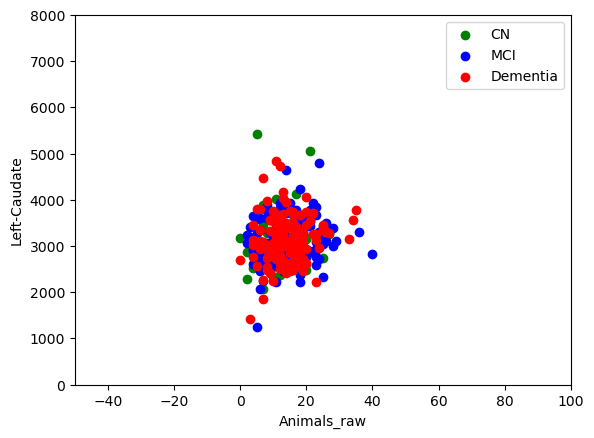

In [28]:
# Animals_raw
CN_df = df[df['syndrome_v2_v2'] == 3]
CN_df = CN_df[['Animals_raw','Left-Caudate']]
CN_df = CN_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
CN_corr_r, p_value = pearsonr(CN_df['Animals_raw'], CN_df['Left-Caudate'])
print(f" CN: Animals_raw vs. Left-Caudate r: {CN_corr_r}, p : {p_value}")

Dementia_df = df[df['syndrome_v2_v2'] == 2]
Dementia_df = Dementia_df[['Animals_raw','Left-Caudate']]
Dementia_df = Dementia_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
Dementia_corr, _ = pearsonr(Dementia_df['Animals_raw'], Dementia_df['Left-Caudate'])
print(f" Dementia: Animals_raw vs. Left-Caudate r: {Dementia_corr}, p : {_}")


MCI_df = df[df['syndrome_v2_v2'] == 1]
MCI_df = MCI_df[['Animals_raw','Left-Caudate']]
MCI_df = MCI_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
MCI_corr, _ = pearsonr(MCI_df['Animals_raw'], MCI_df['Left-Caudate'])
print(f" MCI: Animals_raw vs. Left-Caudate r: {MCI_corr}, p : {_}")

# Animals_raw vs. Left-Caudate
draw_scatterplot(CN_df, 'Animals_raw', 'Left-Caudate', 'green', 'CN')
draw_scatterplot(MCI_df, 'Animals_raw', 'Left-Caudate', 'blue', 'MCI')
draw_scatterplot(Dementia_df, 'Animals_raw', 'Left-Caudate', 'red', 'Dementia')

# show the plot
plt.show()

 CN: FAS_total_raw vs. Right-Caudate r: 0.16768105836291744, p : 0.2003277094549648
 Dementia: FAS_total_raw vs. Right-Caudate r: 0.14243243906799638, p : 0.09201991771755698
 MCI: FAS_total_raw vs. Right-Caudate r: 0.22666429895870077, p : 0.0028713965937069976


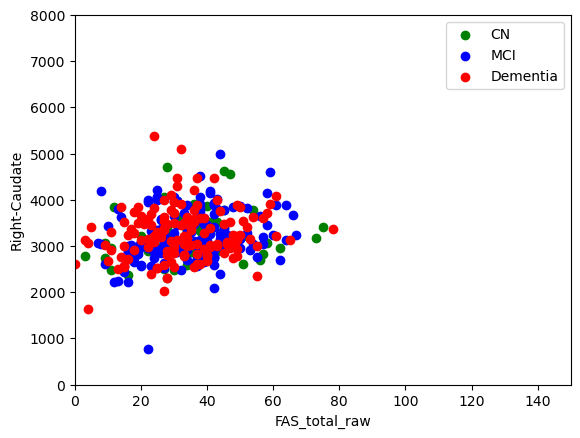

In [23]:
# Animals_raw
CN_df = df[df['syndrome_v2_v2'] == 3]
CN_df = CN_df[['FAS_total_raw','Right-Caudate']]
CN_df = CN_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
CN_corr_r, p_value = pearsonr(CN_df['FAS_total_raw'], CN_df['Right-Caudate'])
print(f" CN: FAS_total_raw vs. Right-Caudate r: {CN_corr_r}, p : {p_value}")

Dementia_df = df[df['syndrome_v2_v2'] == 2]
Dementia_df = Dementia_df[['FAS_total_raw','Right-Caudate']]
Dementia_df = Dementia_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
Dementia_corr, _ = pearsonr(Dementia_df['FAS_total_raw'], Dementia_df['Right-Caudate'])
print(f" Dementia: FAS_total_raw vs. Right-Caudate r: {Dementia_corr}, p : {_}")


MCI_df = df[df['syndrome_v2_v2'] == 1]
MCI_df = MCI_df[['FAS_total_raw','Right-Caudate']]
MCI_df = MCI_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
MCI_corr, _ = pearsonr(MCI_df['FAS_total_raw'], MCI_df['Right-Caudate'])
print(f" MCI: FAS_total_raw vs. Right-Caudate r: {MCI_corr}, p : {_}")

# Animals_raw vs. Left-Caudate
draw_scatterplot(CN_df, 'FAS_total_raw', 'Right-Caudate', 'green', 'CN')
draw_scatterplot(MCI_df, 'FAS_total_raw', 'Right-Caudate', 'blue', 'MCI')
draw_scatterplot(Dementia_df, 'FAS_total_raw', 'Right-Caudate', 'red', 'Dementia')

# show the plot
plt.show()

 CN: Animals_raw vs. Right-Caudate r: 0.16555507293109378, p : 0.20617537933027397
 Dementia: Animals_raw vs. Right-Caudate r: 0.13635801214830115, p : 0.10817340812268181
 MCI: Animals_raw vs. Right-Caudate r: 0.10039114761859541, p : 0.19271941576988944


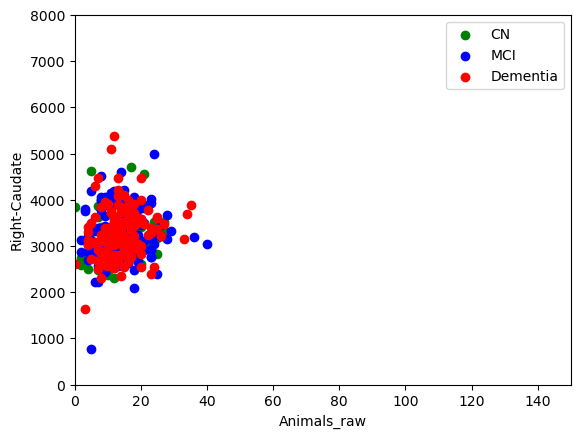

In [24]:
# Animals_raw
CN_df = df[df['syndrome_v2_v2'] == 3]
CN_df = CN_df[['Animals_raw','Right-Caudate']]
CN_df = CN_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
CN_corr_r, p_value = pearsonr(CN_df['Animals_raw'], CN_df['Right-Caudate'])
print(f" CN: Animals_raw vs. Right-Caudate r: {CN_corr_r}, p : {p_value}")

Dementia_df = df[df['syndrome_v2_v2'] == 2]
Dementia_df = Dementia_df[['Animals_raw','Right-Caudate']]
Dementia_df = Dementia_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
Dementia_corr, _ = pearsonr(Dementia_df['Animals_raw'], Dementia_df['Right-Caudate'])
print(f" Dementia: Animals_raw vs. Right-Caudate r: {Dementia_corr}, p : {_}")


MCI_df = df[df['syndrome_v2_v2'] == 1]
MCI_df = MCI_df[['Animals_raw','Right-Caudate']]
MCI_df = MCI_df.replace([np.nan, np.inf,-np.inf],np.nan).dropna()
MCI_corr, _ = pearsonr(MCI_df['Animals_raw'], MCI_df['Right-Caudate'])
print(f" MCI: Animals_raw vs. Right-Caudate r: {MCI_corr}, p : {_}")

# Animals_raw vs. Left-Caudate
draw_scatterplot(CN_df, 'Animals_raw', 'Right-Caudate', 'green', 'CN')
draw_scatterplot(MCI_df, 'Animals_raw', 'Right-Caudate', 'blue', 'MCI')
draw_scatterplot(Dementia_df, 'Animals_raw', 'Right-Caudate', 'red', 'Dementia')

# show the plot
plt.show()